In [ ]:
print("hello f*****s")

hello f*****s


## Step 1
1. List your friends:
    - Write down the names of at least 10 to 15 friends or acquaintances.
    - Think about the relationships among them. Consiuder how they are connected (e.g., common friends, coworkers, classmates).
2. Label Relationships:
    - Define the nature of the relationships:
        - Direct friend (1)
        - Acquaintance (0)
        - Family (2)
        - Best friend (3)
    - Create a simple table to organize this data. You can use a spreadsheet or write it down.

## Step 2
1. Save your data:
    a. Create a CSV file named friends_network.csv with the structure defined in step 1.
    b. Ensure that the first row contains header: Person_A, Person_B, Relationship_Type

- Example CSV Format Person_A, Person_B,  Relationship_Type Alice,Bob,1 Alice,Charlie,0 Bob Charlie,3 Charlie,David,2 David,Eve,1

## Step 3
- Create a Jupyter Notebook or Python Script:
    - Use the following code to load your csv file, create a graph, and visualize your friend network.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

friends_csv = pd.read_csv("friends_network.csv")
df = pd.DataFrame(friends_csv)
df

,Person_A,Person_B,Relationship_Type
0,friend1,friend11,1
1,friend2,friend12,3
2,friend3,friend13,3
3,friend4,friend14,3
4,friend5,friend15,1
5,friend6,friend16,3
6,friend7,friend17,3
7,friend8,friend18,3
8,friend9,friend19,3
9,friend10,friend20,1


EdgeView([('friend11', 'friend1'), ('friend12', 'friend2'), ('friend13', 'friend3'), ('friend14', 'friend4'), ('friend15', 'friend5'), ('friend16', 'friend6'), ('friend17', 'friend7'), ('friend18', 'friend8'), ('friend19', 'friend9'), ('friend20', 'friend10')])

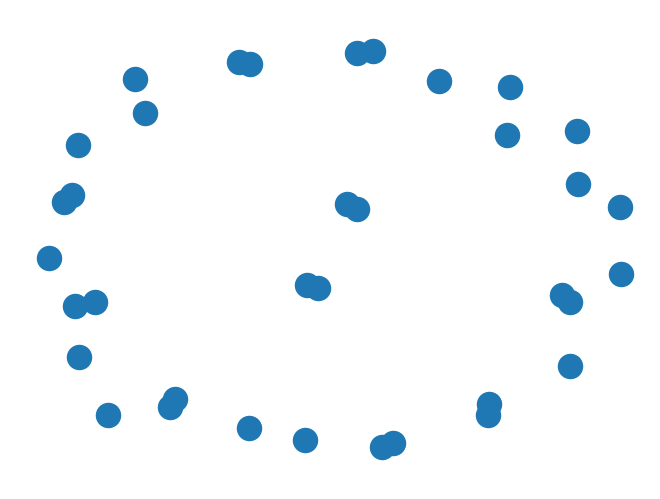

In [ ]:
import networkx as nx
G = nx.Graph()

for i in range(len(df['Person_A'])):
    G.add_nodes_from(df['Person_A'][i])

for i in range(len(df['Person_A'])):
    G.add_edges_from([(df['Person_A'][i], df['Person_A'][i], {"weight" : df['Relationship_Type'][i]})], length=10)
# print(G.nodes)
weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw(G, width=weights)
G.edges()

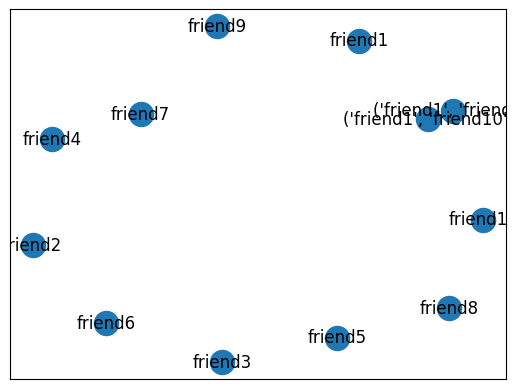

[('friend1', 'friend10'),
 ('friend1', 'friend2'),
 ('friend1', 'friend3'),
 ('friend1', 'friend4'),
 ('friend1', 'friend5'),
 ('friend1', 'friend6'),
 ('friend1', 'friend7'),
 ('friend1', 'friend8'),
 ('friend1', 'friend9'),
 ('friend10', 'friend2'),
 ('friend10', 'friend3'),
 ('friend10', 'friend4'),
 ('friend10', 'friend5'),
 ('friend10', 'friend6'),
 ('friend10', 'friend7'),
 ('friend10', 'friend8'),
 ('friend10', 'friend9'),
 ('friend2', 'friend3'),
 ('friend2', 'friend4'),
 ('friend2', 'friend5'),
 ('friend2', 'friend6'),
 ('friend2', 'friend7'),
 ('friend2', 'friend8'),
 ('friend2', 'friend9'),
 ('friend3', 'friend4'),
 ('friend3', 'friend5'),
 ('friend3', 'friend6'),
 ('friend3', 'friend7'),
 ('friend3', 'friend8'),
 ('friend3', 'friend9'),
 ('friend4', 'friend5'),
 ('friend4', 'friend6'),
 ('friend4', 'friend7'),
 ('friend4', 'friend8'),
 ('friend4', 'friend9'),
 ('friend5', 'friend6'),
 ('friend5', 'friend7'),
 ('friend5', 'friend8'),
 ('friend5', 'friend9'),
 ('friend6', 'fr

In [ ]:
from itertools import combinations
import networkx as nx

# wtf
d = df.groupby('Person_A').agg({'Relationship_Type': lambda x: x.tolist()}).to_dict()['Relationship_Type']

combos = list(combinations(d.keys(), 2))
edge_lst = [(combos[0],
          combos[1],
          len(set(d[combo[0]]) & set(d[combo[1]])))
         for combo in combos if len(set(d[combo[0]]) & set(d[combo[1]])) > 0]

g = nx.Graph()
g.add_nodes_from(d)
g.add_weighted_edges_from(edge_lst)

pos = nx.spring_layout(g)
edgewidth = [g[u][v]['weight'] for u, v in g.edges()]
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, width=edgewidth)
nx.draw_networkx_labels(g, pos)
plt.show()
list(combinations(d.keys(), 2))

In [ ]:
r = df[df['Object'] == 14852]
edges = []
for idx, rr in r.iterrows():
    edges.append((rr['Object'], rr['AttributeName']))
g = nx.DiGraph()
g .add_edges_from(edges)

plt.figure(figsize = (20, 10))
nx.draw(g, with_labels = True, node_size = 5000, font_size = 20)
plt.show()

KeyError: "None of [Index(['friend1', 'friend2', 'friend3', 'friend4', 'friend5', 'friend6',\n       'friend7', 'friend8', 'friend9', 'friend10'],\n      dtype='object')] are in the [columns]"

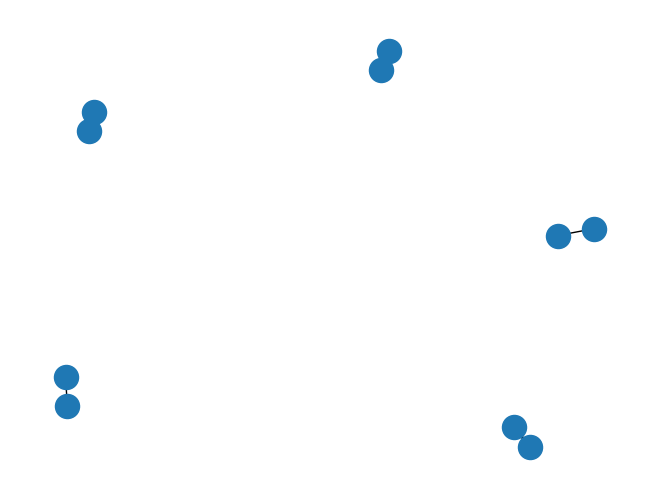

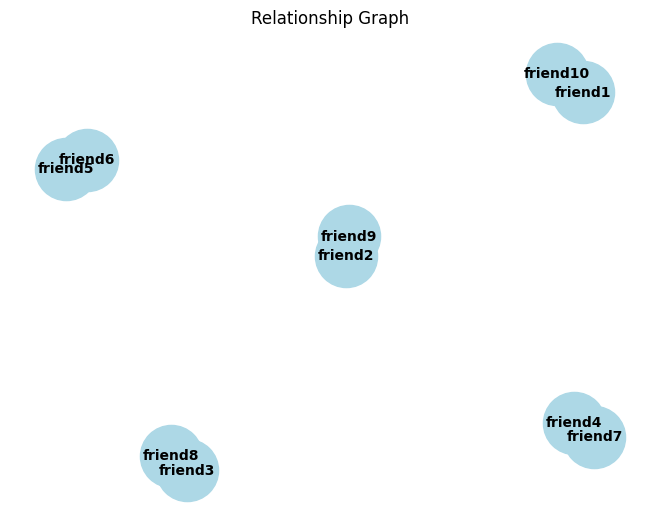

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.Graph()

# Define the relationship data
data = [
    ("friend1", "friend10", 1),
    ("friend2", "friend9", 3),
    ("friend3", "friend8", 3),
    ("friend4", "friend7", 3),
    ("friend5", "friend6", 1),
    ("friend6", "friend5", 3),
    ("friend7", "friend4", 3),
    ("friend8", "friend3", 3),
    ("friend9", "friend2", 3),
    ("friend10", "friend1", 1),
]

# Add edges to the graph
for person_a, person_b, relationship_type in data:
    G.add_edge(person_a, person_b, weight=relationship_type)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.title("Relationship Graph")
plt.show()

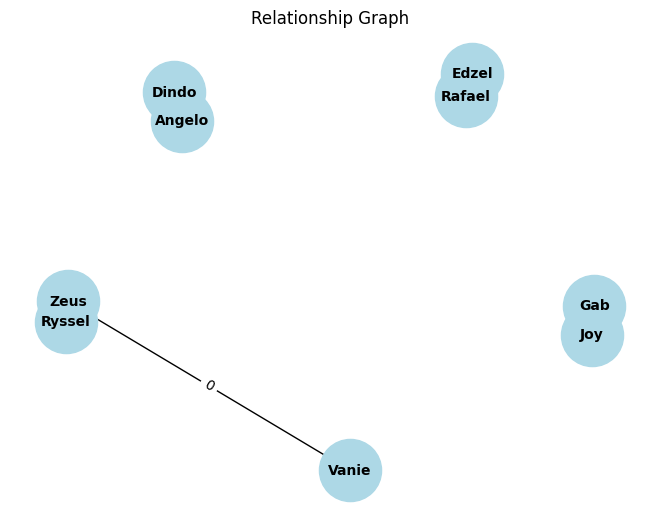

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Define the relationship data
data = [
    ("Joy", "Gab", 1),
    ("Vanie", "Zeus", 0),
    ("Zeus", "Ryssel", 3),
    ("Edzel", "Rafael", 2),
    ("Dindo", "Angelo", 1),
]

# Add edges to the graph with weights
for person_a, person_b, relationship_type in data:
    G.add_edge(person_a, person_b, weight=relationship_type)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.title("Relationship Graph")
plt.show()

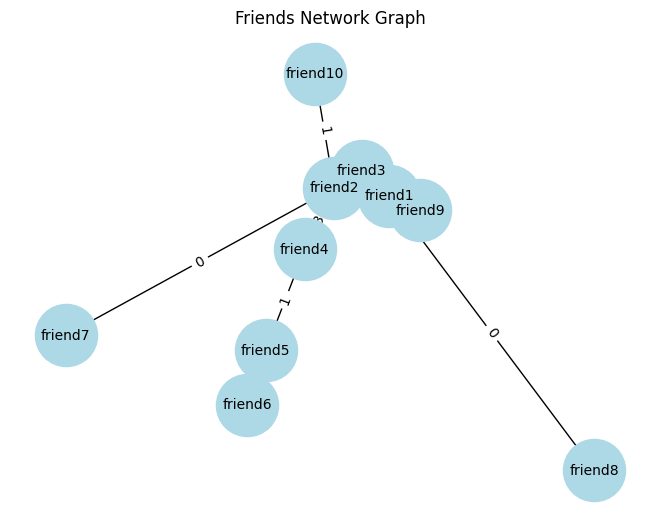

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv('friends_network.csv')

G = nx.Graph()

for index, row in data.iterrows():
    G.add_edge(row['Person_A'], row['Person_B'], weight=row['Relationship_Type'])

pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

plt.title("Friends Network Graph")
plt.show()

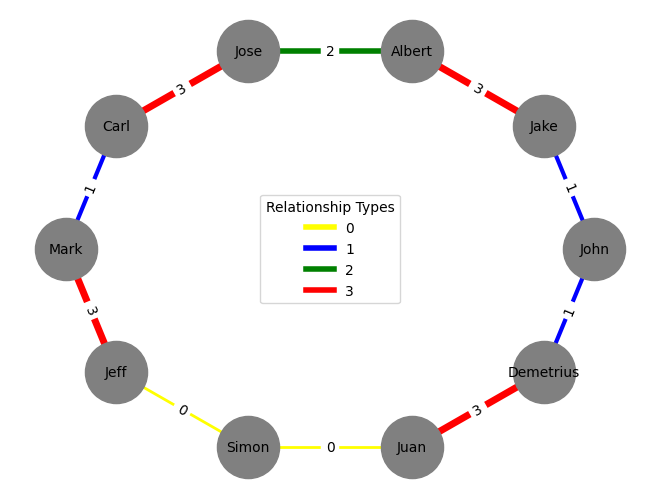

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv('friends_network.csv')
G = nx.Graph()

for index, row in data.iterrows():
    G.add_edge(row['Person_A'], row['Person_B'], weight=row['Relationship_Type'])

edge_colors = []
edge_labels = {}
edge_thickness = []

for u, v, data in G.edges(data=True):
    relationship_type = data['weight']
    if relationship_type == 0:
        edge_colors.append('yellow')
        edge_thickness.append(2)
        edge_labels[(u, v)] = '0'
    elif relationship_type == 1:
        edge_colors.append('blue')
        edge_thickness.append(3)
        edge_labels[(u, v)] = '1'
    elif relationship_type == 2:
        edge_colors.append('green')
        edge_thickness.append(4)
        edge_labels[(u, v)] = '2'
    elif relationship_type == 3:
        edge_colors.append('red')
        edge_thickness.append(5)
        edge_labels[(u, v)] = '3'

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='gray', node_size=2000,
        font_size=10, edge_color=edge_colors, width=edge_thickness)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

legend_labels = {
    '0': 'yellow',
    '1': 'blue',
    '2': 'green',
    '3': 'red'
}

handles = [plt.Line2D([0], [0], color=color, lw=4)
            for color in legend_labels.values()]
plt.legend(handles, legend_labels.keys(), title="Relationship Types",
           loc='center')

plt.show()